In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('medical_examination.csv')

In [7]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
df['overweight'] = (df['weight'] / (df['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)

In [9]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [10]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [13]:
# Draw Categorical Plot

In [15]:
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable',
                 value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])

In [16]:
df_cat = pd.melt(df, var_name = 'variable', 
                 value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

In [18]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


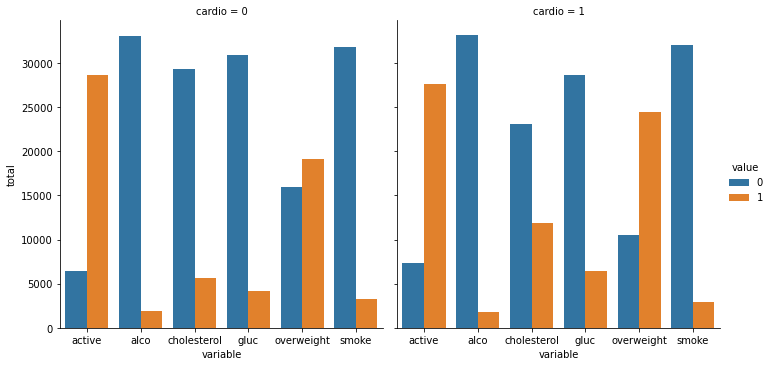

In [19]:
 # Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
fig = fig.fig